# Coding Challenge:

This afternoon we're starting off with a fairly simple data challenge from the world of biology. Please limit yourself to **3 hours** time! At the end of the 3 hours we will have 1 hour of presentations by you guys to showcase your results and findings. 

**Your task is to develop a model that predicts whether a biopsied breast cell is benign (not harmful) or malignant (cancerous), given a set of attributes about the cell.**

Even though this seems like a fairly straightforward task, there are so many ways you can explore, visualize, engineer your features, and tell a story with this data! Being able to clearly communicate your thought process is one of the most important parts of a data challenge. Some important questions to think about are: how can you best explore the data? Why did you select your particular model? How did you validate your model?

Please code and annotate your analysis in an Jupyter notebook.  If you are insistent on using R, there are ways to do that in Jupyter as well. No one has demos today so please complete everything this afternoon and then upload your final product into Dropbox (Data Challenges/Week 5).

The dataset consists of 699 cells for which you have the following features:

1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10 
11. Class: (2 for benign, 4 for malignant)


... and the dataset is available here: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data

Happy coding!

In [43]:
# set up the environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

In [2]:
# read in data
columns=('id','thickness','size_u','shape_u','adhesion','size_single','bare_nuc',\
         'bland_chro','norm_nuc','mitosis','class')
df_cells = pd.read_csv("breast-cancer-wisconsin.data", names=columns, index_col=0)
df_cells.index.name=None
# should have 699 rows, one for each cell
print(len(columns))
print(df_cells.shape)
df_cells.head()

11
(699, 10)


,thickness,size_u,shape_u,adhesion,size_single,bare_nuc,bland_chro,norm_nuc,mitosis,class
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
#let's make sure the data is clean and complete, and learn its basic characteristics
df_cells.describe()

,thickness,size_u,shape_u,adhesion,size_single,bland_chro,norm_nuc,mitosis,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [4]:
#see if our data is all numeric
df_cells.dtypes

thickness       int64
size_u          int64
shape_u         int64
adhesion        int64
size_single     int64
bare_nuc       object
bland_chro      int64
norm_nuc        int64
mitosis         int64
class           int64
dtype: object

In [5]:
#what's up with bare_nuc?
print(df_cells[df_cells['bare_nuc']=='?'].shape)
print(df_cells[df_cells['bare_nuc']!='?'].shape)
print(df_cells.shape)
df_cells[df_cells['bare_nuc']=='?']


(16, 10)
(683, 10)
(699, 10)


,thickness,size_u,shape_u,adhesion,size_single,bare_nuc,bland_chro,norm_nuc,mitosis,class
1057013,8,4,5,1,2,?,7,3,1,4
1096800,6,6,6,9,6,?,7,8,1,2
1183246,1,1,1,1,1,?,2,1,1,2
1184840,1,1,3,1,2,?,2,1,1,2
1193683,1,1,2,1,3,?,1,1,1,2
1197510,5,1,1,1,2,?,3,1,1,2
1241232,3,1,4,1,2,?,3,1,1,2
169356,3,1,1,1,2,?,3,1,1,2
432809,3,1,3,1,2,?,2,1,1,2
563649,8,8,8,1,2,?,6,10,1,4


In [6]:
#lets just remove those rows
df_cells = df_cells[df_cells['bare_nuc']!= '?']
df_cells.shape

(683, 10)

In [7]:
df_cells['bare_nuc'] = df_cells['bare_nuc'].astype(int)
df_cells.dtypes

thickness      int64
size_u         int64
shape_u        int64
adhesion       int64
size_single    int64
bare_nuc       int64
bland_chro     int64
norm_nuc       int64
mitosis        int64
class          int64
dtype: object

In [9]:
# quickly look at which features seem the most correlated with each other,
# paying special attention to the 'class' row
df_cells.corr()
# it looks like bare_nuc, size, and shape uniformity are highly correlated to class

,thickness,size_u,shape_u,adhesion,size_single,bare_nuc,bland_chro,norm_nuc,mitosis,class
thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
size_u,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
shape_u,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
size_single,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
bare_nuc,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
bland_chro,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
norm_nuc,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
mitosis,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1100b3d68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115a16898>]], dtype=object)

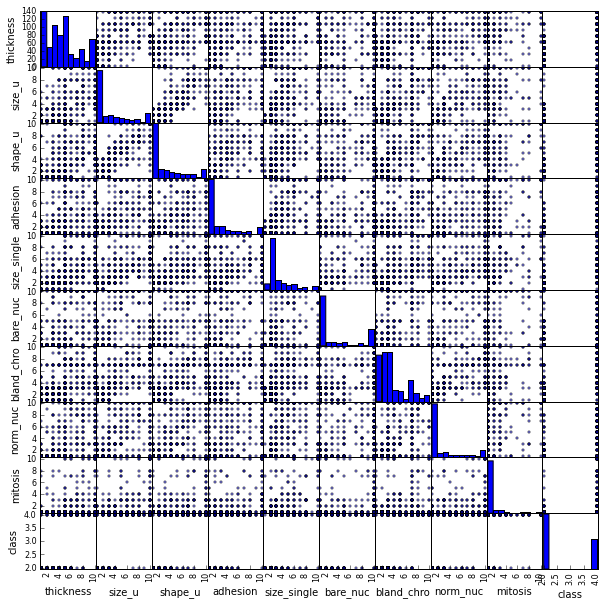

In [10]:
# Do certain cells act as outliers? Which things correspond to each other?
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df_cells, figsize=(10,10))

In [44]:
#split into train and text

msk = np.random.rand(len(df_cells)) < 0.8

train = df_cells[msk]
test = df_cells[~msk]

print(len(test),len(train),len(df_cells))

147 536 683


In [46]:
147+536

683

welp, I got stuck on software not working and ran out of time. Definitely need to NOT do that during my real interview!

I WAS going to use logistic regression since I have a binary dependant variable that I am trying to predict (class, which is malignant or benign) based upon a bunch of features.

Unfortunately I got stuck trying to get patsty to work and it kept failing for unknown reasons. I need to work on pivoting faster when something fails.
